# import stuff

In [3]:
import numpy
import xarray
import matplotlib
import matplotlib.pyplot as mp
import datetime
import glob
import netCDF4
import pandas
#import wrf
import string
import seaborn
import matplotlib.colors
import cmocean
import astropy.convolution

import cartopy

DEGREE_SIGN = u'\u00B0'
mp.rcParams.update({'mathtext.default': 'regular'})

# open control data

In [4]:
root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/400/ens_mean_wrfout_files'
file_list = sorted(glob.glob(root_dir+'/'+'wrfout*.nc'))
ds_list = [netCDF4.Dataset(file) for file in file_list]
cont_mfds = xarray.open_mfdataset(root_dir + '/' + 'wrfout*.nc')

In [5]:
ptot_400 = numpy.load('DATA_ptot_400.npy')
tk_400 = numpy.load('DATA_tk_400.npy')
ua_400 = numpy.load('DATA_ua_400.npy')
wa_400 = numpy.load('DATA_wa_400.npy')
geopot_400 = numpy.load('DATA_geopot_400.npy')

In [6]:
rainc_400 = cont_mfds['RAINC']
rainnc_400 = cont_mfds['RAINNC']
qvapor_400 = cont_mfds['QVAPOR']
w_400 = cont_mfds['W']
u_400 = cont_mfds['U']
pblh_400 = cont_mfds['PBLH']
phb_400 = cont_mfds['PHB']
qcloud_400 = cont_mfds['QCLOUD']
cldfra_400 = cont_mfds['CLDFRA']

In [7]:
time = cont_mfds['Times'].values
xlat = cont_mfds['XLAT'].values[0,:,:]
xlong = cont_mfds['XLONG'].values[0,:,:]
landmask = cont_mfds['LANDMASK'].values[0,:,:]
landmask_midpoints = landmask[1:,1:]

# open phys data

In [8]:
root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/1000/ens_mean_wrfout_files'
file_list = sorted(glob.glob(root_dir+'/'+'wrfout*.nc'))
ds_list = [netCDF4.Dataset(file) for file in file_list]
phys_mfds = xarray.open_mfdataset(root_dir + '/' + 'wrfout*.nc')

In [9]:
ptot_1000 = numpy.load('DATA_ptot_1000.npy')
ua_1000 = numpy.load('DATA_ua_1000.npy')
wa_1000 = numpy.load('DATA_wa_1000.npy')
tk_1000 = numpy.load('DATA_tk_1000.npy')

In [10]:
rainc_1000 = phys_mfds['RAINC']
rainnc_1000 = phys_mfds['RAINNC']
qvapor_1000 = phys_mfds['QVAPOR']
w_1000 = phys_mfds['W']
u_1000 = phys_mfds['U']
pblh_1000 = phys_mfds['PBLH']
phb_1000 = phys_mfds['PHB']
qcloud_1000 = phys_mfds['QCLOUD']
cldfra_1000 = phys_mfds['CLDFRA']

# get time data

In [11]:
time_datetimes = pandas.to_datetime([i.decode('utf-8') for i in time], format = '%Y-%m-%d_%H:%M:%S')
time_datetimes_shifted = time_datetimes + datetime.timedelta(hours=-4)

In [12]:
g = 9.81

# get latlon subset

In [13]:
lat_hi = 10
lat_lo = -10
latlon_indices = (xlat<=lat_hi)&(xlat>=lat_lo)&(landmask==1)

# PBLH diffs

In [14]:
pblh_diffs = pblh_1000.values-pblh_400.values

In [15]:
pblh_diffs_latlon_nan = numpy.copy(pblh_diffs)
pblh_diffs_latlon_nan[:,~latlon_indices]=numpy.nan

# qvapor

In [18]:
qvapor_diffs = qvapor_1000.values-qvapor_400.values

In [19]:
qvapor_diffs_latlon_nan = numpy.copy(qvapor_diffs)
qvapor_diffs_latlon_nan[:,:,~latlon_indices]=numpy.nan
qvapor_400_latlon_nan = numpy.copy(qvapor_400.values)
qvapor_400_latlon_nan[:,:,~latlon_indices]=numpy.nan

In [20]:
qvapor_diffs_latmean = numpy.nanmean(qvapor_diffs_latlon_nan, axis=2)
qvapor_400_latmean = numpy.nanmean(qvapor_400_latlon_nan, axis=2)

/export/home/blangenb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/export/home/blangenb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


# cldfra

In [21]:
cldfra_diffs = cldfra_1000.values-cldfra_400.values

In [22]:
cldfra_diffs_latlon_nan = numpy.copy(cldfra_diffs)
cldfra_diffs_latlon_nan[:,:,~latlon_indices]=numpy.nan

In [23]:
cldfra_400_latlon_nan = numpy.copy(cldfra_400.values)
cldfra_400_latlon_nan[:,:,~latlon_indices]=numpy.nan

In [24]:
cldfra_diffs_latmean = numpy.nanmean(cldfra_diffs_latlon_nan, axis=2)

/export/home/blangenb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


In [25]:
cldfra_400_latmean = numpy.nanmean(cldfra_400_latlon_nan, axis=2)

/export/home/blangenb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


# wa and ua diffs

In [26]:
ua_diffs = ua_1000-ua_400
wa_diffs = wa_1000-wa_400

In [27]:
ua_400_latlon_nan = numpy.copy(ua_400)
ua_400_latlon_nan[:,:,~latlon_indices] = numpy.nan

In [28]:
ua_diffs_latlon_nan = numpy.copy(ua_diffs)
ua_diffs_latlon_nan[:,:,~latlon_indices] = numpy.nan

wa_diffs_latlon_nan = numpy.copy(wa_diffs)
wa_diffs_latlon_nan[:,:,~latlon_indices] = numpy.nan

In [29]:
ua_400_latmean = numpy.nanmean(ua_400_latlon_nan, axis=2)

/export/home/blangenb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


In [30]:
ua_diffs_latmean = numpy.nanmean(ua_diffs_latlon_nan, axis=2)
wa_diffs_latmean = numpy.nanmean(wa_diffs_latlon_nan, axis=2)

#ua_400_latmean = numpy.nanmean(ua_400_latlon_nan, axis=2)
#wa_400_latmean = numpy.nanmean(wa_400_latlon_nan, axis=2)

/export/home/blangenb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/export/home/blangenb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


# tk

In [31]:
tk_diffs = tk_1000 - tk_400

In [32]:
tk_diffs_latlon_nan = numpy.copy(tk_diffs)
tk_diffs_latlon_nan[:,:,~latlon_indices]=numpy.nan

In [33]:
tk_400_latlon_nan = numpy.copy(tk_400)
tk_400_latlon_nan[:,:,~latlon_indices]=numpy.nan

In [34]:
tk_diffs_latmean = numpy.nanmean(tk_diffs_latlon_nan, axis=2)

/export/home/blangenb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


In [35]:
tk_400_latmean = numpy.nanmean(tk_400_latlon_nan, axis=2)

/export/home/blangenb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


# ptot

In [36]:
ptot_400_latlon_nan = numpy.copy(ptot_400)
ptot_400_latlon_nan[:,:,~latlon_indices]=numpy.nan

In [37]:
ptot_400_latmean = numpy.nanmean(ptot_400_latlon_nan, axis=2)

/export/home/blangenb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


# geopotential

In [38]:
geopot_400_latlon_nan = numpy.copy(geopot_400)
geopot_400_latlon_nan[:,:,~latlon_indices]=numpy.nan

In [39]:
geopot_400_latmean = numpy.nanmean(geopot_400_latlon_nan, axis=2)

/export/home/blangenb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


# pblh

In [40]:
pblh_diffs_latlon_nan = numpy.copy(pblh_diffs)
pblh_diffs_latlon_nan[:,~latlon_indices]=numpy.nan

In [41]:
pblh_400_latlon_nan = numpy.copy(pblh_400)
pblh_400_latlon_nan[:,~latlon_indices]=numpy.nan

In [42]:
pblh_1000_latlon_nan = numpy.copy(pblh_1000)
pblh_1000_latlon_nan[:,~latlon_indices]=numpy.nan

Set lontidues west of 290º equal to NaN so that Andes don't have a weird boundary layer

In [43]:
lon_lo = 290-360
lon_hi = 320-360
lon_indices = (xlong[0,:]<lon_lo)|(xlong[0,:]>lon_hi)

In [44]:
pblh_400_latlon_nan[:,:,lon_indices]=numpy.nan
pblh_1000_latlon_nan[:,:,lon_indices]=numpy.nan

In [45]:
pblh_diffs_latmean = numpy.nanmean(pblh_diffs_latlon_nan, axis=1)
pblh_400_latmean = numpy.nanmean(pblh_400_latlon_nan, axis=1)
pblh_1000_latmean = numpy.nanmean(pblh_1000_latlon_nan, axis=1)

/export/home/blangenb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/export/home/blangenb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/export/home/blangenb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


plot qvapor and wind climatologies

In [46]:
# make color map
minval=0. # for inferno:  0.18
maxval=0.95 # for inferno: 1.0
n=256
full_cmap = mp.get_cmap('YlGnBu')
cmap_partial = matplotlib.colors.LinearSegmentedColormap.from_list(\
    'trunc({n},{a:.2f},{b:.2f})'.format(n=full_cmap.name, a=minval, b=maxval),\
    full_cmap(numpy.linspace(minval, maxval, n)))

In [47]:
colors1 = cmocean.cm.turbid_r(numpy.linspace(0., 1, 128))
colors2 = cmocean.cm.deep(numpy.linspace(0, 1, 128))

# combine them and build a new colormap
colors = numpy.vstack((colors1, colors2))
cmap_precip = matplotlib.colors.LinearSegmentedColormap.from_list('my_colormap', colors)

## plot qvapor, cldfra, and tk differences at 15:00

In [48]:
time_indices_1500 = [(t.hour in [15]) and (t.day in range(2,11)) for t in time_datetimes_shifted]
time_indices_1400 = [(t.hour in [14]) and (t.day in range(2,11)) for t in time_datetimes_shifted]

In [49]:
qvapor_diffs_latmean_timechunk = numpy.nanmean(qvapor_diffs_latmean[time_indices_1500,:,:], axis=0)
cldfra_diffs_latmean_timechunk = numpy.nanmean(cldfra_diffs_latmean[time_indices_1500,:,:], axis=0)
tk_diffs_latmean_timechunk = numpy.nanmean(tk_diffs_latmean[time_indices_1500,:,:], axis=0)
ua_diffs_latmean_timechunk = numpy.nanmean(ua_diffs_latmean[time_indices_1500,:,:], axis=0)
wa_diffs_latmean_timechunk = numpy.nanmean(wa_diffs_latmean[time_indices_1500,:,:], axis=0)

qvapor_400_latmean_timechunk = numpy.nanmean(qvapor_400_latmean[time_indices_1500,:,:], axis=0)
tk_400_latmean_timechunk = numpy.nanmean(tk_400_latmean[time_indices_1500,:,:], axis=0)
cldfra_400_latmean_timechunk = numpy.nanmean(cldfra_400_latmean[time_indices_1500,:,:], axis=0)

pblh_400_latmean_timechunk = numpy.nanmean(pblh_400_latmean[time_indices_1400,:], axis=0)
pblh_1000_latmean_timechunk = numpy.nanmean(pblh_1000_latmean[time_indices_1400,:], axis=0)

ua_400_latmean_timechunk = numpy.nanmean(ua_400_latmean[time_indices_1500,:], axis=0)

geopot_400_latmean_timechunk = numpy.nanmean(geopot_400_latmean[time_indices_1500,:,:], axis=0)
ptot_400_latmean_timechunk = numpy.nanmean(ptot_400_latmean[time_indices_1500,:,:], axis=0)

/export/home/blangenb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/export/home/blangenb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/export/home/blangenb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/export/home/blangenb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/export/home/blangenb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/export/home/blangenb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/export/home/blangenb/miniconda3/lib/python3.7/site-packages/ipykernel_lau

# create mesh

In [50]:
xx,zz=numpy.meshgrid(xlong[0,:],geopot_400_latmean_timechunk[:,:].mean(axis=1)/(1000*g))

In [51]:
wa_diffs_latmean.shape

(241, 29, 289)

/export/home/blangenb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


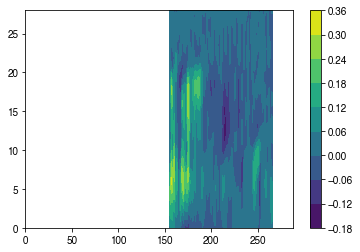

In [52]:
mp.contourf(numpy.nanmean(wa_diffs_latmean[24:,:,:]*100., axis=0))
mp.colorbar()

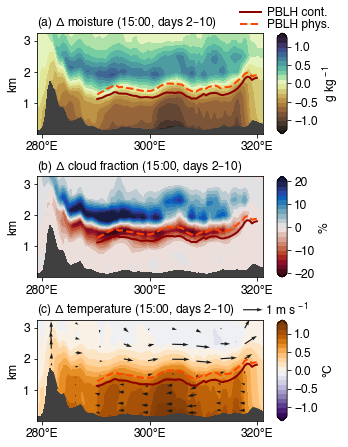

In [55]:
fontsize = 12

fig = mp.figure(figsize=(4,6))

#axes[0].contourf(qvapor_diffs_latmean_timechunk)
#axes[1].contourf(cldfra_diffs_latmean_timechunk)
#axes[2].contourf(tk_diffs_latmean_timechunk)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

ax_list = []
contour_list = []



ax = fig.add_subplot(311)#, projection=cartopy.crs.PlateCarree())
levels = numpy.arange(-1.25,1.251,0.125)
contour_plot = ax.contourf(xx+360.,\
                           geopot_400_latmean_timechunk/(g*1000.),\
                           qvapor_diffs_latmean_timechunk*1000.,\
                           levels=levels,\
                           cmap=cmap_precip,\
                           extend='both')
ax.plot(xx[0,:]+360.,pblh_400_latmean_timechunk/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
ax.plot(xx[0,:]+360.,pblh_1000_latmean_timechunk/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)
ax.tick_params(labelsize=fontsize)
ax.set_xlim(279,321)
ax.set_ylim(0,3.25)
ax.set_yticks([1,2,3])
ax.set_xticks([280,300,320])
ax.set_xticklabels(xticks_format)
ax.set_ylabel('km', fontsize=fontsize)
ax.set_facecolor('0.25')
ax_list.append(ax)
contour_list.append(contour_plot)

for c in contour_plot.collections:
    c.set_edgecolor('face')
    #c.set_rasterized(True)

ax = fig.add_subplot(312)#, projection=cartopy.crs.PlateCarree())
levels = numpy.arange(-20,20.1,2)
contour_plot = ax.contourf(xx+360.,\
                           geopot_400_latmean_timechunk/(g*1000.),\
                           cldfra_diffs_latmean_timechunk*100.,\
                           levels=levels,\
                           cmap=cmocean.cm.balance_r,\
                           extend='both')
ax.plot(xx[0,:]+360.,pblh_400_latmean_timechunk/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
ax.plot(xx[0,:]+360.,pblh_1000_latmean_timechunk/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)
ax.tick_params(labelsize=fontsize)
ax.set_ylim(0,3.25)
ax.set_xlim(279,321)
ax.set_yticks([1,2,3])
ax.set_xticks([280,300,320])
ax.set_xticklabels(xticks_format)
ax.set_ylabel('km', fontsize=fontsize)
ax.set_facecolor('0.25')
ax_list.append(ax)
contour_list.append(contour_plot)

for c in contour_plot.collections:
    c.set_edgecolor('face')
    c.set_rasterized(True)






every_nth_lon=10
every_nth_z=1
z_indices=[1,3,5,6,7,8,9,10,11,12,13,14,15,16]
quiver_scale = .3 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = .2#.75
quiver_key_scale = 1
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*15
quiver_head_length = quiver_shaft_width*15

ax = fig.add_subplot(313)#, projection=cartopy.crs.PlateCarree())
levels = numpy.arange(-1.25,1.251,0.125)
contour_plot = ax.contourf(xx+360.,\
                           geopot_400_latmean_timechunk/(g*1000.),\
                           tk_diffs_latmean_timechunk,\
                           levels=levels,\
                           cmap='PuOr_r',\
                           extend='both')
ax.plot(xx[0,:]+360.,pblh_400_latmean_timechunk/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
ax.plot(xx[0,:]+360.,pblh_1000_latmean_timechunk/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)
ax.tick_params(labelsize=fontsize)
ax.set_ylim(0,3.25)
ax.set_xlim(279,321)
ax.set_yticks([1,2,3])
ax.set_xticks([280,300,320])
ax.set_xticklabels(xticks_format)
ax.set_ylabel('km', fontsize=fontsize)
ax.set_facecolor('0.25')
ax_list.append(ax)
contour_list.append(contour_plot)

for c in contour_plot.collections:
    c.set_edgecolor('face')
    #c.set_rasterized(True)


quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
          geopot_400_latmean_timechunk[z_indices,::every_nth_lon]/(g*1000.),\
          ua_diffs_latmean_timechunk[z_indices,::every_nth_lon],\
          wa_diffs_latmean_timechunk[z_indices,::every_nth_lon]*100.,\
          units='xy', scale=quiver_scale, \
          color=quiver_color, zorder=3, \
          width=quiver_shaft_width)#, headwidth=quiver_head_width,\
          #headlength=quiver_head_length)

fig.tight_layout(h_pad=2)



handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(0.9,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower left', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)

ax_list[0].text(s='(a) $\Delta$ moisture (15:00, days 2–10)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax_list[0].transAxes)
ax_list[1].text(s='(b) $\Delta$ cloud fraction (15:00, days 2–10)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax_list[1].transAxes)
ax_list[2].text(s='(c) $\Delta$ temperature (15:00, days 2–10)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax_list[2].transAxes)

axpos1 = ax_list[0].get_position()
axpos2 = ax_list[1].get_position()
axpos3 = ax_list[2].get_position()

cbar_ax1 = fig.add_axes([axpos1.x1+0.05,axpos1.y0,0.035,axpos1.height])
cbar_ax2 = fig.add_axes([axpos2.x1+0.05,axpos2.y0,0.035,axpos2.height])
cbar_ax3 = fig.add_axes([axpos3.x1+0.05,axpos3.y0,0.035,axpos3.height])

cbar1 = fig.colorbar(contour_list[0], cax=cbar_ax1)
cbar_ax1.tick_params(labelsize=fontsize)
cbar1.set_ticks([-1,-.5,0,.5,1])
cbar1.set_label('g kg$^{\,-1}$', fontsize=fontsize)

cbar2 = fig.colorbar(contour_list[1], cax=cbar_ax2)
cbar_ax2.tick_params(labelsize=fontsize)
cbar2.set_ticks([-20,-10,0,10,20])
cbar2.set_label('%', fontsize=fontsize)

cbar3 = fig.colorbar(contour_list[2], cax=cbar_ax3)
cbar_ax3.tick_params(labelsize=fontsize)
cbar3.set_ticks([-1.5,-1,-.5,0,.5,1,1.5])
cbar3.set_label('$\degree$C', fontsize=fontsize)

for c in cbar_ax1.collections:
    c.set_edgecolor('face')
#     c.set_rasterized(True)
for c in cbar_ax2.collections:
    c.set_edgecolor('face')
#     c.set_rasterized(True)
for c in cbar_ax3.collections:
    c.set_edgecolor('face')
#     c.set_rasterized(True)

quiver_key = ax_list[2].quiverkey(quiver_plot, \
                                  coordinates='axes', \
                                  X=1, Y=1.1, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[2].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=1.01, y=1.02,\
                                  ha='left', va='bottom',\
                                  transform=ax_list[2].transAxes, \
                                  fontsize=fontsize)

fig.savefig('../figures/MAIN_fig05.pdf', dpi=300, bbox_inches='tight')

# calculate percent changes for manuscript

/export/home/blangenb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:117: RuntimeWarning: Mean of empty slice
/export/home/blangenb/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


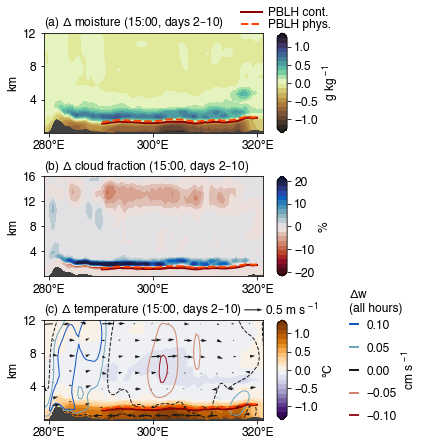

In [56]:
fontsize = 12

fig = mp.figure(figsize=(4,6))

#axes[0].contourf(qvapor_diffs_latmean_timechunk)
#axes[1].contourf(cldfra_diffs_latmean_timechunk)
#axes[2].contourf(tk_diffs_latmean_timechunk)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

ax_list = []
contour_list = []



ax = fig.add_subplot(311)#, projection=cartopy.crs.PlateCarree())
levels = numpy.arange(-1.25,1.251,0.125)
contour_plot = ax.contourf(xx+360.,\
                           geopot_400_latmean_timechunk/(g*1000.),\
                           qvapor_diffs_latmean_timechunk*1000.,\
                           levels=levels,\
                           cmap=cmap_precip,\
                           extend='both')
ax.plot(xx[0,:]+360.,pblh_400_latmean_timechunk/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
ax.plot(xx[0,:]+360.,pblh_1000_latmean_timechunk/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)
ax.tick_params(labelsize=fontsize)
ax.set_xlim(279,321)
ax.set_ylim(0,12)
ax.set_yticks([4,8,12])
ax.set_xticks([280,300,320])
ax.set_xticklabels(xticks_format)
ax.set_ylabel('km', fontsize=fontsize)
ax.set_facecolor('0.25')
ax_list.append(ax)
contour_list.append(contour_plot)

for c in contour_plot.collections:
    c.set_edgecolor('face')
    #c.set_rasterized(True)



ax = fig.add_subplot(312)#, projection=cartopy.crs.PlateCarree())
levels = numpy.arange(-20,20.1,2)
contour_plot = ax.contourf(xx+360.,\
                           geopot_400_latmean_timechunk/(g*1000.),\
                           cldfra_diffs_latmean_timechunk*100.,\
                           levels=levels,\
                           cmap=cmocean.cm.balance_r,\
                           extend='both')


ax.plot(xx[0,:]+360.,pblh_400_latmean_timechunk/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
ax.plot(xx[0,:]+360.,pblh_1000_latmean_timechunk/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)
ax.tick_params(labelsize=fontsize)
ax.set_ylim(0,16)
ax.set_xlim(279,321)
ax.set_yticks([4,8,12,16])
ax.set_xticks([280,300,320])
ax.set_xticklabels(xticks_format)
ax.set_ylabel('km', fontsize=fontsize)
ax.set_facecolor('0.25')
ax_list.append(ax)
contour_list.append(contour_plot)

for c in contour_plot.collections:
    c.set_edgecolor('face')
    #c.set_rasterized(True)







every_nth_lon=7
every_nth_z=1
z_indices=[3,7,11]+[i for i in range(13,29,2)]
quiver_scale = .15 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = .2#.75
quiver_key_scale = 0.5
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*15
quiver_head_length = quiver_shaft_width*15

ax = fig.add_subplot(313)#, projection=cartopy.crs.PlateCarree())
levels = numpy.arange(-1.25,1.251,0.125)
contour_plot = ax.contourf(xx+360.,\
                           geopot_400_latmean_timechunk/(g*1000.),\
                           tk_diffs_latmean_timechunk,\
                           levels=levels,\
                           cmap='PuOr_r',\
                           extend='both')
ax.plot(xx[0,:]+360.,pblh_400_latmean_timechunk/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
ax.plot(xx[0,:]+360.,pblh_1000_latmean_timechunk/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)
ax.tick_params(labelsize=fontsize)
ax.set_ylim(0,12)
ax.set_xlim(279,321)
ax.set_yticks([4,8,12])
ax.set_xticks([280,300,320])
ax.set_xticklabels(xticks_format)
ax.set_ylabel('km', fontsize=fontsize)
ax.set_facecolor('0.25')
ax_list.append(ax)
contour_list.append(contour_plot)

################################################################################
################################################################################
################################################################################

diff_w_levels = [-.1,-.05,0,.05,.1]
diff_w_colors = [cmocean.cm.balance_r(i) for i in numpy.linspace(0.15,.85,diff_w_levels.__len__())]
diff_w_colors[2] = '0.1'

field = numpy.nanmean(wa_diffs_latmean[24:,:,:], axis=0)
kernel = astropy.convolution.Gaussian2DKernel(x_stddev=1.75)
field_convolved = astropy.convolution.convolve(field, kernel)

contour_lines = ax.contour(xx+360.,\
                           geopot_400_latmean[0,:,:]/10000.,\
                           field_convolved*100.,\
                           levels=diff_w_levels,\
                           colors=diff_w_colors, linewidths=[1], \
                           linestyles=['-','-','--','-','-'], extend='both')

################################################################################
################################################################################
################################################################################

for c in contour_plot.collections:
    c.set_edgecolor('face')
    #c.set_rasterized(True)

quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
          geopot_400_latmean_timechunk[z_indices,::every_nth_lon]/(g*1000.),\
          ua_diffs_latmean_timechunk[z_indices,::every_nth_lon],\
          wa_diffs_latmean_timechunk[z_indices,::every_nth_lon]*10.,\
          units='xy', scale=quiver_scale, \
          color=quiver_color, zorder=3, \
          width=quiver_shaft_width)#, headwidth=quiver_head_width,\
          #headlength=quiver_head_length)
    
fig.tight_layout(h_pad=2)



handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(0.9,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower left', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)

ax_list[0].text(s='(a) $\Delta$ moisture (15:00, days 2–10)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax_list[0].transAxes)
ax_list[1].text(s='(b) $\Delta$ cloud fraction (15:00, days 2–10)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax_list[1].transAxes)
ax_list[2].text(s='(c) $\Delta$ temperature (15:00, days 2–10)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax_list[2].transAxes)

axpos1 = ax_list[0].get_position()
axpos2 = ax_list[1].get_position()
axpos3 = ax_list[2].get_position()

cbar_ax1 = fig.add_axes([axpos1.x1+0.05,axpos1.y0,0.035,axpos1.height])
cbar_ax2 = fig.add_axes([axpos2.x1+0.05,axpos2.y0,0.035,axpos2.height])
cbar_ax3 = fig.add_axes([axpos3.x1+0.05,axpos3.y0,0.035,axpos3.height])
cbar_lines_ax = fig.add_axes([axpos3.x1+0.3,axpos3.y0,0.035,axpos3.height])

cbar1 = fig.colorbar(contour_list[0], cax=cbar_ax1)
cbar_ax1.tick_params(labelsize=fontsize)
cbar1.set_ticks([-1,-.5,0,.5,1])
cbar1.set_label('g kg$^{\,-1}$', fontsize=fontsize)

cbar2 = fig.colorbar(contour_list[1], cax=cbar_ax2)
cbar_ax2.tick_params(labelsize=fontsize)
cbar2.set_ticks([-20,-10,0,10,20])
cbar2.set_label('%', fontsize=fontsize)

cbar3 = fig.colorbar(contour_list[2], cax=cbar_ax3)
cbar_ax3.tick_params(labelsize=fontsize)
cbar3.set_ticks([-1.5,-1,-.5,0,.5,1,1.5])
cbar3.set_label('$\degree$C', fontsize=fontsize)

cbar_lines = fig.colorbar(contour_lines, cax=cbar_lines_ax)
cbar_lines_ax.tick_params(labelsize=fontsize)
cbar_lines.set_label('cm s$^{\,-1}$', fontsize=fontsize)
cbar_lines_ax.tick_params(axis='y', which='both', right='off')
cbar_lines_ax.get_children()[0].set_linewidths(2)
cbar_lines_ax.get_children()[1].set_facecolor('None')
cbar_lines_ax.get_children()[2].set_facecolor('None')
cbar_lines.patch.set_visible(False)
cbar_lines.outline.set_visible(False)

cbar_lines_ax.text(s='$\Delta$w\n(all hours)', x=0, y=1.05, ha='left', va='bottom', \
                   fontsize=fontsize, transform=cbar_lines_ax.transAxes)


for c in cbar_ax1.collections:
    c.set_edgecolor('face')
for c in cbar_ax2.collections:
    c.set_edgecolor('face')
for c in cbar_ax3.collections:
    c.set_edgecolor('face')

quiver_key = ax_list[2].quiverkey(quiver_plot, \
                                  coordinates='axes', \
                                  X=1, Y=1.1, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[2].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=1.01, y=1.02,\
                                  ha='left', va='bottom',\
                                  transform=ax_list[2].transAxes, \
                                  fontsize=fontsize)

fig.savefig('../figures/SI_fig06.pdf', dpi=300, bbox_inches='tight')

# first day

In [57]:
times_to_plot = [12,13,14,15,16,17,18,19]
times_to_plot_local = [8,9,10,11,12,13,14,15]

# qvapor

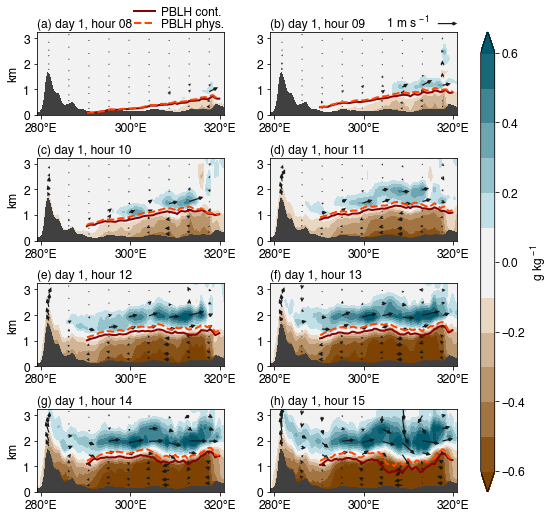

In [59]:
fontsize=12

fig = mp.figure(figsize=(6.5,7))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-0.6,0.61,0.1)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

every_nth_lon=10
every_nth_z=1
z_indices=[1,3,5,6,7,8,9,10,11,12,13,14,15,16]
quiver_scale = .25
quiver_shaft_width = .25
quiver_key_scale = 1
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*13
quiver_head_length = quiver_shaft_width*13

nrows=4;ncols=2
ax_list = []

for t_idx in range(times_to_plot.__len__()):
    t = times_to_plot[t_idx]
    ax = fig.add_subplot(nrows,ncols,t_idx+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xx+360.,\
                               geopot_400_latmean[0,:,:]/(g*1000.),\
                               qvapor_diffs_latmean[t,:,:]*1000.,\
                               levels=levels,\
                               cmap=seaborn.diverging_palette(35, 220, as_cmap=True, s=99, l=35, sep=25),\
                               extend='both')

    quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
              geopot_400_latmean[0,z_indices,::every_nth_lon]/(g*1000.),\
              ua_diffs_latmean[t,z_indices,::every_nth_lon],\
              wa_diffs_latmean[t,z_indices,::every_nth_lon]*100.,\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3, \
              width=quiver_shaft_width, headwidth=quiver_head_width,\
              headlength=quiver_head_length)
    
    for c in contour_plot.collections:
        c.set_edgecolor('face')
        #c.set_rasterized(True)

    
    if t_idx==1:
        quiver_plot_for_key = quiver_plot

    ax.plot(xx[0,:]+360.,pblh_400_latmean[t,:]/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
    ax.plot(xx[0,:]+360.,pblh_1000_latmean[t,:]/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)

    ax.tick_params(labelsize=fontsize)
    #ax.set_ylim(1013.25,700)
    ax.set_ylim(0,3.25)
    ax.set_yticks([0,1,2,3])
    #ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
    ax.set_xlim(279,321)
    
    #ax.set_yticks([1000,900,800,700])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    
    ax.text(s='('+string.ascii_lowercase[t_idx]+') day 1, hour '+'{:02d}'.format(times_to_plot_local[t_idx]), \
            x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax.set_facecolor('0.25')
    ax_list.append(ax)

fig.tight_layout(h_pad=2, w_pad=2)

[ax.set_ylabel('km', fontsize=fontsize) for ax in ax_list[0::2]]

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label('g kg$^{\,-1}$', fontsize=fontsize)

for c in cbar_axes.collections:
    c.set_edgecolor('face')

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower right', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)

quiver_key = ax_list[1].quiverkey(quiver_plot_for_key, \
                                  coordinates='axes', \
                                  X=1, Y=1.1, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[1].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=0.85, y=1.02,\
                                  ha='right', va='bottom',\
                                  transform=ax_list[1].transAxes, \
                                  fontsize=fontsize)

fig.savefig('../figures/MAIN_fig08.pdf', dpi=300, bbox_inches='tight')

# qcloud

In [60]:
import matplotlib.cm as mcm

In [61]:
mcm.YlOrRd

/export/home/blangenb/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


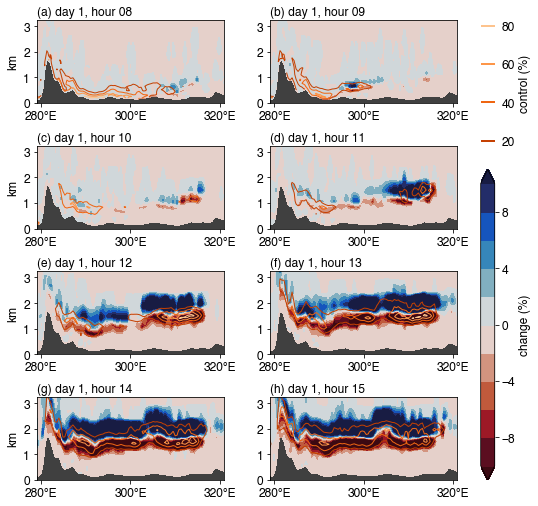

In [62]:
fontsize=12

fig = mp.figure(figsize=(6.5,7))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-10,10.1,2)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

every_nth_lon=10
every_nth_z=1
z_indices=[1,3,5,6,7,8,9,10,11,12,13,14,15,16]
quiver_scale = .25
quiver_shaft_width = .25
quiver_key_scale = 1
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*13
quiver_head_length = quiver_shaft_width*13

nrows=4;ncols=2
ax_list = []

contour_lines_list = []
clim_cloud_levels = [20.,40.,60.,80.]
clim_cloud_colors = [mcm.Oranges_r(i) for i in numpy.linspace(0.2,0.7,clim_cloud_levels.__len__())]

for t_idx in range(times_to_plot.__len__()):
    t = times_to_plot[t_idx]
    ax = fig.add_subplot(nrows,ncols,t_idx+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xx+360.,\
                               geopot_400_latmean[0,:,:]/10000.,\
                               cldfra_diffs_latmean[t,:,:]*100.,\
                               levels=levels,\
                               cmap=cmocean.cm.balance_r,\
                               extend='both')
    
    field = cldfra_400_latmean[t,:,:]
    #kernel = astropy.convolution.Gaussian2DKernel(x_stddev=1.)
    #field_convolved = astropy.convolution.convolve(field, kernel)
    field_convolved = field

    contour_lines = ax.contour(xx+360.,\
                               geopot_400_latmean[0,:,:]/10000.,\
                               field_convolved*100.,\
                               levels=clim_cloud_levels,\
                               colors=clim_cloud_colors, linewidths=[1], extend='both')
    
    contour_lines_list.append(contour_lines)

#     quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
#               geopot_400_latmean[0,z_indices,::every_nth_lon]/(g*1000.),\
#               ua_diffs_latmean[t,z_indices,::every_nth_lon],\
#               wa_diffs_latmean[t,z_indices,::every_nth_lon]*100.,\
#               units='xy', scale=quiver_scale, \
#               color=quiver_color, zorder=3, \
#               width=quiver_shaft_width, headwidth=quiver_head_width,\
#               headlength=quiver_head_length)

    for c in contour_plot.collections:
        c.set_edgecolor('face')
        #c.set_rasterized(True)

    if t_idx==1:
        quiver_plot_for_key = quiver_plot

#     ax.plot(xx[0,:]+360.,pblh_400_latmean[t,:]/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
#     ax.plot(xx[0,:]+360.,pblh_1000_latmean[t,:]/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)
#     ax.plot(xx[0,:]+360.,pblh_400_latmean[t,:]/1000.,c='orange', label='PBLH cont.', zorder=3, lw=2)
#     ax.plot(xx[0,:]+360.,pblh_1000_latmean[t,:]/1000.,c='gold',ls='--', label='PBLH phys.', zorder=3, lw=2)

    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,3.25)
    ax.set_yticks([0,1,2,3])
    ax.set_xlim(279,321)
    
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    
    ax.text(s='('+string.ascii_lowercase[t_idx]+') day 1, hour '+'{:02d}'.format(times_to_plot_local[t_idx]), \
            x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax.set_facecolor('0.25')
    ax_list.append(ax)

fig.tight_layout(h_pad=2, w_pad=2)

[ax.set_ylabel('km', fontsize=fontsize) for ax in ax_list[0::2]]

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
ax_height = top_pos.y1-bottom_pos.y0
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, ax_height*.675])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label('change (%)', fontsize=fontsize)

cbar_lines_ax = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0+ax_height*0.725, 0.03, ax_height*0.275])
cbar_lines = fig.colorbar(contour_lines_list[0], cax=cbar_lines_ax)
cbar_lines_ax.tick_params(labelsize=fontsize)
cbar_lines.set_label('control (%)', fontsize=fontsize)
cbar_lines_ax.tick_params(axis='y', which='both', right='off')
cbar_lines_ax.get_children()[0].set_linewidths(2)
cbar_lines_ax.get_children()[1].set_facecolor('None')
cbar_lines_ax.get_children()[2].set_facecolor('None')
cbar_lines.patch.set_visible(False)
cbar_lines.outline.set_visible(False)

for c in cbar_axes.collections:
    c.set_edgecolor('face')

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower right', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)

# quiver_key = ax_list[1].quiverkey(quiver_plot_for_key, \
#                                   coordinates='axes', \
#                                   X=1, Y=1.1, labelpos='E', \
#                                   label='', \
#                                   U=quiver_key_scale)
# quiver_key_text = ax_list[1].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
#                                   x=0.9, y=1.02,\
#                                   ha='right', va='bottom',\
#                                   transform=ax_list[1].transAxes, \
#                                   fontsize=fontsize)

fig.savefig('../figures/MAIN_fig09.pdf', dpi=300, bbox_inches='tight')

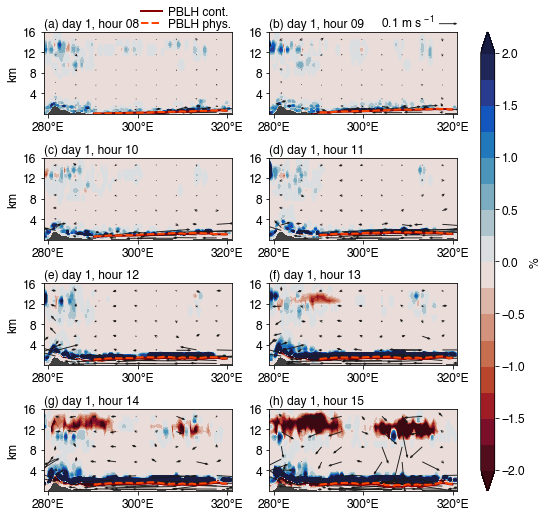

In [73]:
fontsize=12

fig = mp.figure(figsize=(6.5,7))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-2,2.1,0.25)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

every_nth_lon=10
every_nth_z=1
z_indices=[1,5]+[i for i in range(7,29,3)]
quiver_scale = .025
quiver_shaft_width = .2
quiver_key_scale = 0.1
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*13
quiver_head_length = quiver_shaft_width*13

# every_nth_lon=10
# every_nth_z=1
# z_indices=[1,3,5,6,7,8,9,10,11,12,13,14,15,16]
# quiver_scale = .25
# quiver_shaft_width = .25
# quiver_key_scale = 1
# quiver_color = '0.1'
# quiver_head_width = quiver_shaft_width*13
# quiver_head_length = quiver_shaft_width*13


ax_list = []

for t_idx in range(times_to_plot.__len__()):
    t = times_to_plot[t_idx]
    ax = fig.add_subplot(nrows,ncols,t_idx+1)
    
    contour_plot = ax.contourf(xx+360.,\
                               geopot_400_latmean[0,:,:]/(g*1000.),\
                               cldfra_diffs_latmean[t,:,:]*100.,\
                               levels=levels,\
                               cmap=cmocean.cm.balance_r,\
                               extend='both')

    for c in contour_plot.collections:
        c.set_edgecolor('face')
        #c.set_rasterized(True)
    
    quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
              geopot_400_latmean[0,z_indices,::every_nth_lon]/(g*1000.),\
              ua_diffs_latmean[t,z_indices,::every_nth_lon],\
              wa_diffs_latmean[t,z_indices,::every_nth_lon]*10.,\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3, \
              width=quiver_shaft_width, headwidth=quiver_head_width,\
              headlength=quiver_head_length)
    
    if t_idx==1:
        quiver_plot_for_key = quiver_plot

    ax.plot(xx[0,:]+360.,pblh_400_latmean[t,:]/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
    ax.plot(xx[0,:]+360.,pblh_1000_latmean[t,:]/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)

    ax.tick_params(labelsize=fontsize)
    #ax.set_ylim(1013.25,700)
    ax.set_ylim(0,16)
    ax.set_xlim(279,321)
    
    ax.set_xticks([280,300,320])
    ax.set_yticks([4,8,12,16])
    ax.set_xticklabels(xticks_format)
    
    ax.text(s='('+string.ascii_lowercase[t_idx]+') day 1, hour '+'{:02d}'.format(times_to_plot_local[t_idx]), \
            x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax.set_facecolor('0.25')
    ax_list.append(ax)

fig.tight_layout(h_pad=2, w_pad=0.5)

[ax.set_ylabel('km', fontsize=fontsize) for ax in ax_list[0::2]]

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label('%', fontsize=fontsize)

for c in cbar_axes.collections:
    c.set_edgecolor('face')

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower right', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)

quiver_key = ax_list[1].quiverkey(quiver_plot_for_key, \
                                  coordinates='axes', \
                                  X=1, Y=1.1, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[1].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=0.875, y=1.02,\
                                  ha='right', va='bottom',\
                                  transform=ax_list[1].transAxes, \
                                  fontsize=fontsize)

fig.savefig('../figures/SI_fig07.pdf', bbox_inches='tight')